<a href="https://colab.research.google.com/github/gabriellima878/estudospessoais/blob/main/fad15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [69]:
import pandas as pd
import plotnine as p9
import statsmodels.formula.api as smf

In [55]:
dados_brutos_ipca = pd.read_json("https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265/p/all/d/v2265%202?formato=json")
dados_brutos_ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,197912,dezembro 1979
2,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198001,janeiro 1980
3,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198002,fevereiro 1980
4,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198003,março 1980
...,...,...,...,...,...,...,...,...,...,...,...
537,1,Brasil,2,%,4.24,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202408,agosto 2024
538,1,Brasil,2,%,4.42,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202409,setembro 2024
539,1,Brasil,2,%,4.76,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202410,outubro 2024
540,1,Brasil,2,%,4.87,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202411,novembro 2024


In [56]:
dados_brutos_desemprego = pd.read_json("https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201?formato=json")
dados_brutos_desemprego

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre Móvel (Código),Trimestre Móvel
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,jan-fev-mar 2012
2,1,Brasil,2,%,7.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,fev-mar-abr 2012
3,1,Brasil,2,%,7.7,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201205,mar-abr-mai 2012
4,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201206,abr-mai-jun 2012
...,...,...,...,...,...,...,...,...,...,...,...
149,1,Brasil,2,%,6.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202407,mai-jun-jul 2024
150,1,Brasil,2,%,6.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202408,jun-jul-ago 2024
151,1,Brasil,2,%,6.4,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202409,jul-ago-set 2024
152,1,Brasil,2,%,6.2,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202410,ago-set-out 2024


# Tratamento de dados

In [57]:
dados_tratados_desemprego = (
    dados_brutos_desemprego
    .rename(columns = {"V": "desemprego", "D3C": "data"})
    .query("desemprego not in ['Valor', '...']")
    .assign(
        data = lambda x: pd.to_datetime(x.data, format = "%Y%m"),
        desemprego = lambda x: x.desemprego.astype(float)
        )
    .filter(["data", "desemprego"])
)
dados_tratados_desemprego

,data,desemprego
1,2012-03-01,8.0
2,2012-04-01,7.8
3,2012-05-01,7.7
4,2012-06-01,7.6
5,2012-07-01,7.5
...,...,...
149,2024-07-01,6.8
150,2024-08-01,6.6
151,2024-09-01,6.4
152,2024-10-01,6.2


In [58]:
dados_tratados_ipca = (
    dados_brutos_ipca
    .rename(columns = {"V": "ipca", "D3C": "data"})
    .query("ipca not in ['Valor', '...']")
    .assign(
        data = lambda x: pd.to_datetime(x.data, format = "%Y%m"),
        ipca = lambda x: x.ipca.astype(float)
        )
    .filter(["data", "ipca"])
    .query("data >= @pd.to_datetime('2004-01-01')")
)
dados_tratados_ipca

,data,ipca
290,2004-01-01,7.71
291,2004-02-01,6.69
292,2004-03-01,5.89
293,2004-04-01,5.26
294,2004-05-01,5.15
...,...,...
537,2024-08-01,4.24
538,2024-09-01,4.42
539,2024-10-01,4.76
540,2024-11-01,4.87


In [65]:
dados_cruzados = (
    dados_tratados_ipca
    .set_index("data")
    .join(other = dados_tratados_desemprego.set_index("data"), how = "inner")
    .reset_index()
    )
dados_cruzados

,data,ipca,desemprego
0,2012-03-01,5.24,8.0
1,2012-04-01,5.10,7.8
2,2012-05-01,4.99,7.7
3,2012-06-01,4.92,7.6
4,2012-07-01,5.20,7.5
...,...,...,...
148,2024-07-01,4.50,6.8
149,2024-08-01,4.24,6.6
150,2024-09-01,4.42,6.4
151,2024-10-01,4.76,6.2


# Análise de dados

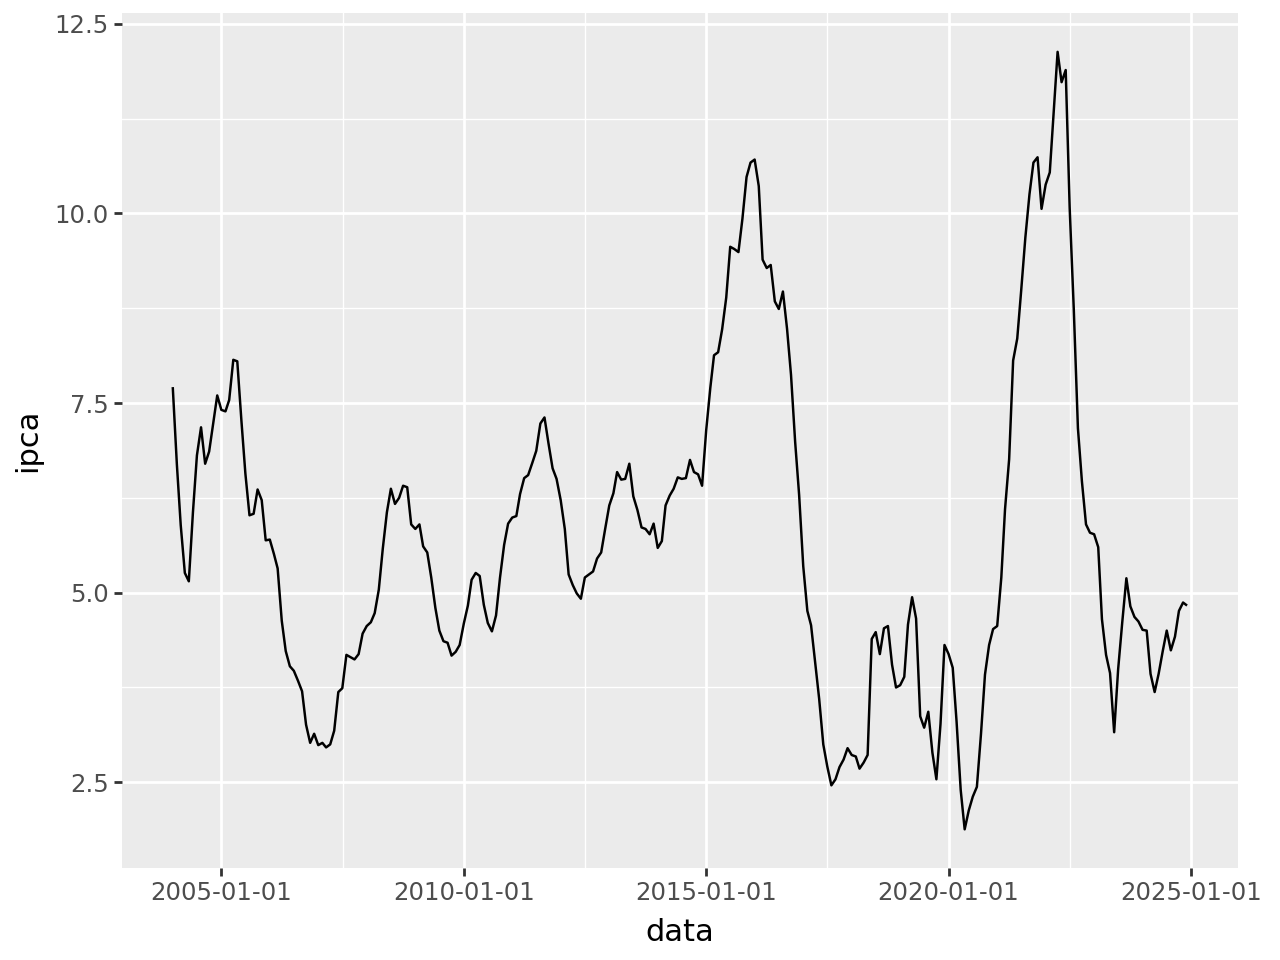

In [59]:
# Como a inflação se comportou no Brasil?
(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x = "data", y = "ipca") +
    p9.geom_line()
)

In [60]:
# Qual o período com menores e maiores taxas de inflação?
print(dados_tratados_ipca.sort_values("ipca").iloc[0])
print(dados_tratados_ipca.query("ipca == ipca.max()"))


data    2020-05-01 00:00:00
ipca                   1.88
Name: 486, dtype: object
          data   ipca
509 2022-04-01  12.13


In [61]:
# Qual o valor médio da inflação do Brasil e como é a distribuição de seus valores?
dados_tratados_ipca.describe()

,data,ipca
count,252,252.000000
mean,2014-06-16 14:17:08.571428608,5.711786
min,2004-01-01 00:00:00,1.880000
25%,2009-03-24 06:00:00,4.230000
50%,2014-06-16 00:00:00,5.480000
75%,2019-09-08 12:00:00,6.602500
max,2024-12-01 00:00:00,12.130000
std,NaN,2.115706


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


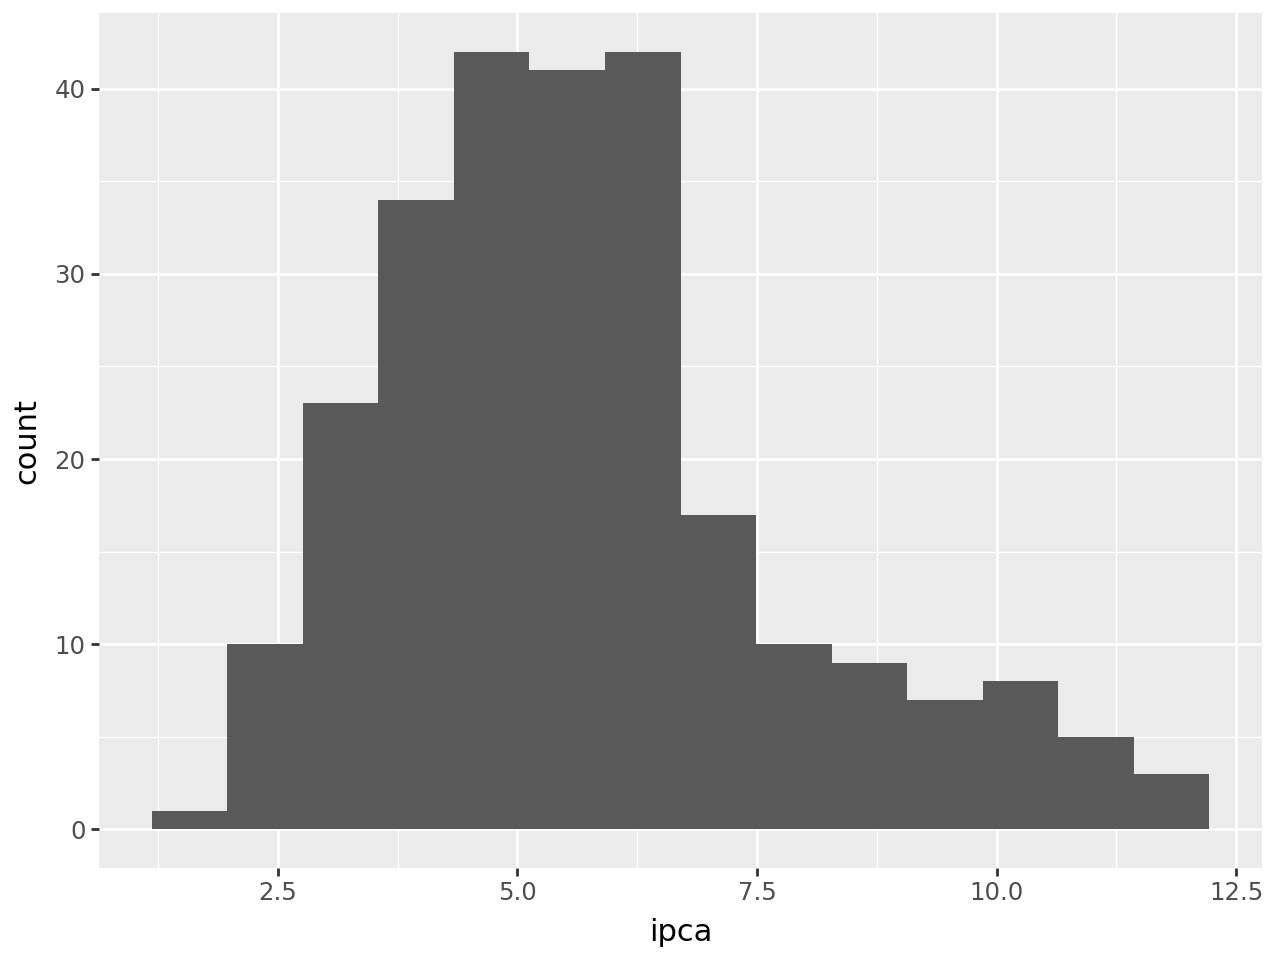

In [62]:
(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x = "ipca") +
    p9.geom_histogram()
)

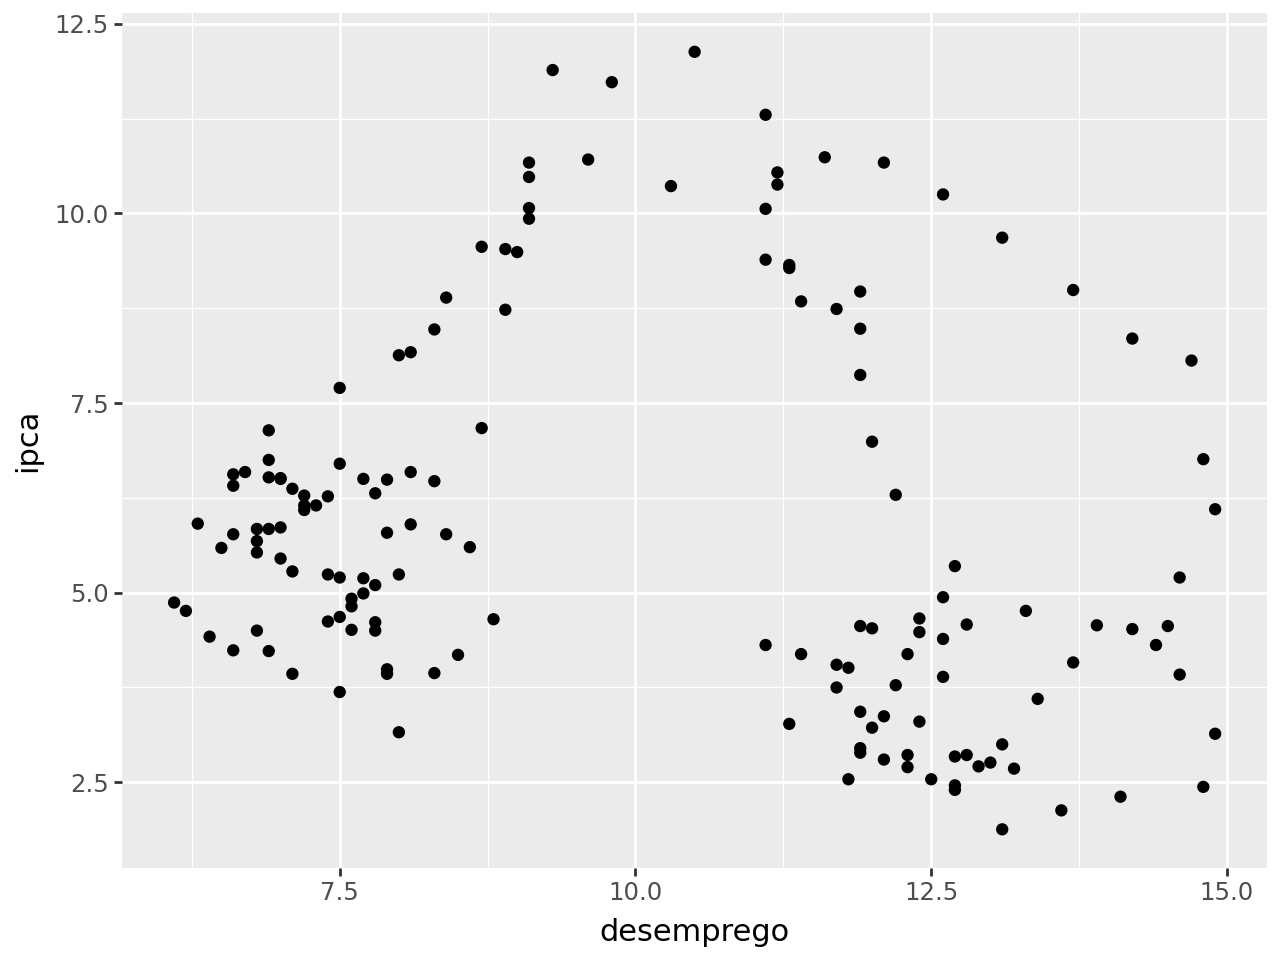

In [68]:
# O que afeta a inflação? Com qual variável ela se relaciona?
(
    p9.ggplot(dados_cruzados) +
    p9.aes(x = "desemprego", y = "ipca") +
    p9.geom_point()
)

In [70]:
modelo = smf.ols("ipca ~ desemprego", data = dados_cruzados).fit()
modelo

In [71]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ipca   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.598
Date:                Tue, 14 Jan 2025   Prob (F-statistic):             0.0336
Time:                        17:19:39   Log-Likelihood:                -354.18
No. Observations:                 153   AIC:                             712.4
Df Residuals:                     151   BIC:                             718.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5077      0.784      9.572      0.0

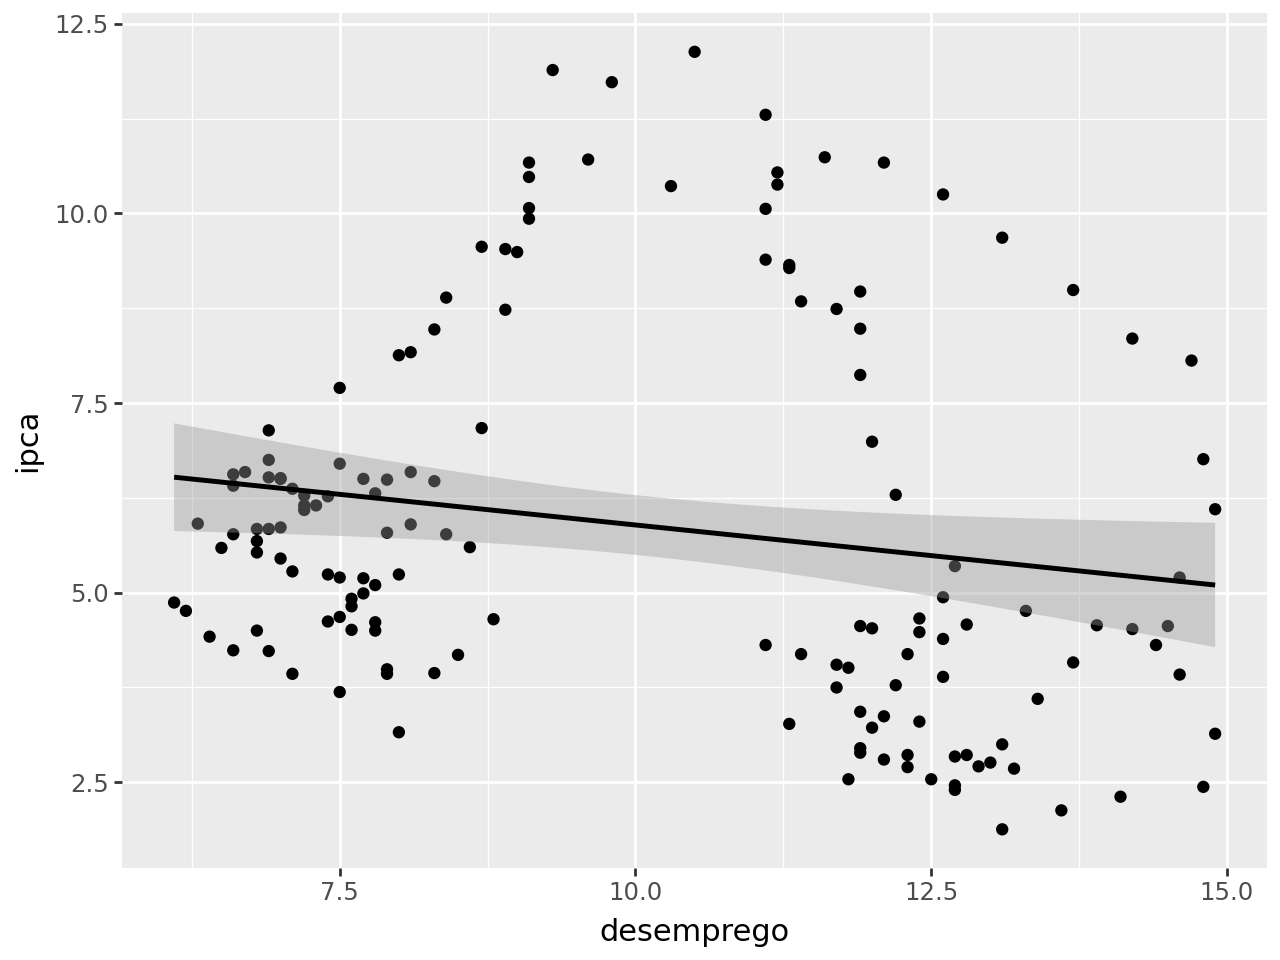

In [72]:
(
    p9.ggplot(dados_cruzados) +
    p9.aes(x = "desemprego", y = "ipca") +
    p9.geom_point() +
    p9.geom_smooth(method = "lm")
)